# Predicting Fire Area Damage

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [1]:
import pandas as pd

forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

/var/folders/mp/s3t18scd1pvck503vkmczpjw0000gn/T/ipykernel_63210/2084191356.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [2]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Question 1.2: Apply log(area+1) to the data

In [7]:
import numpy as np

forestfires['log_area'] = np.log(forestfires['area'] + 1)


Question 2.1: Visually explore the data using pairplot.

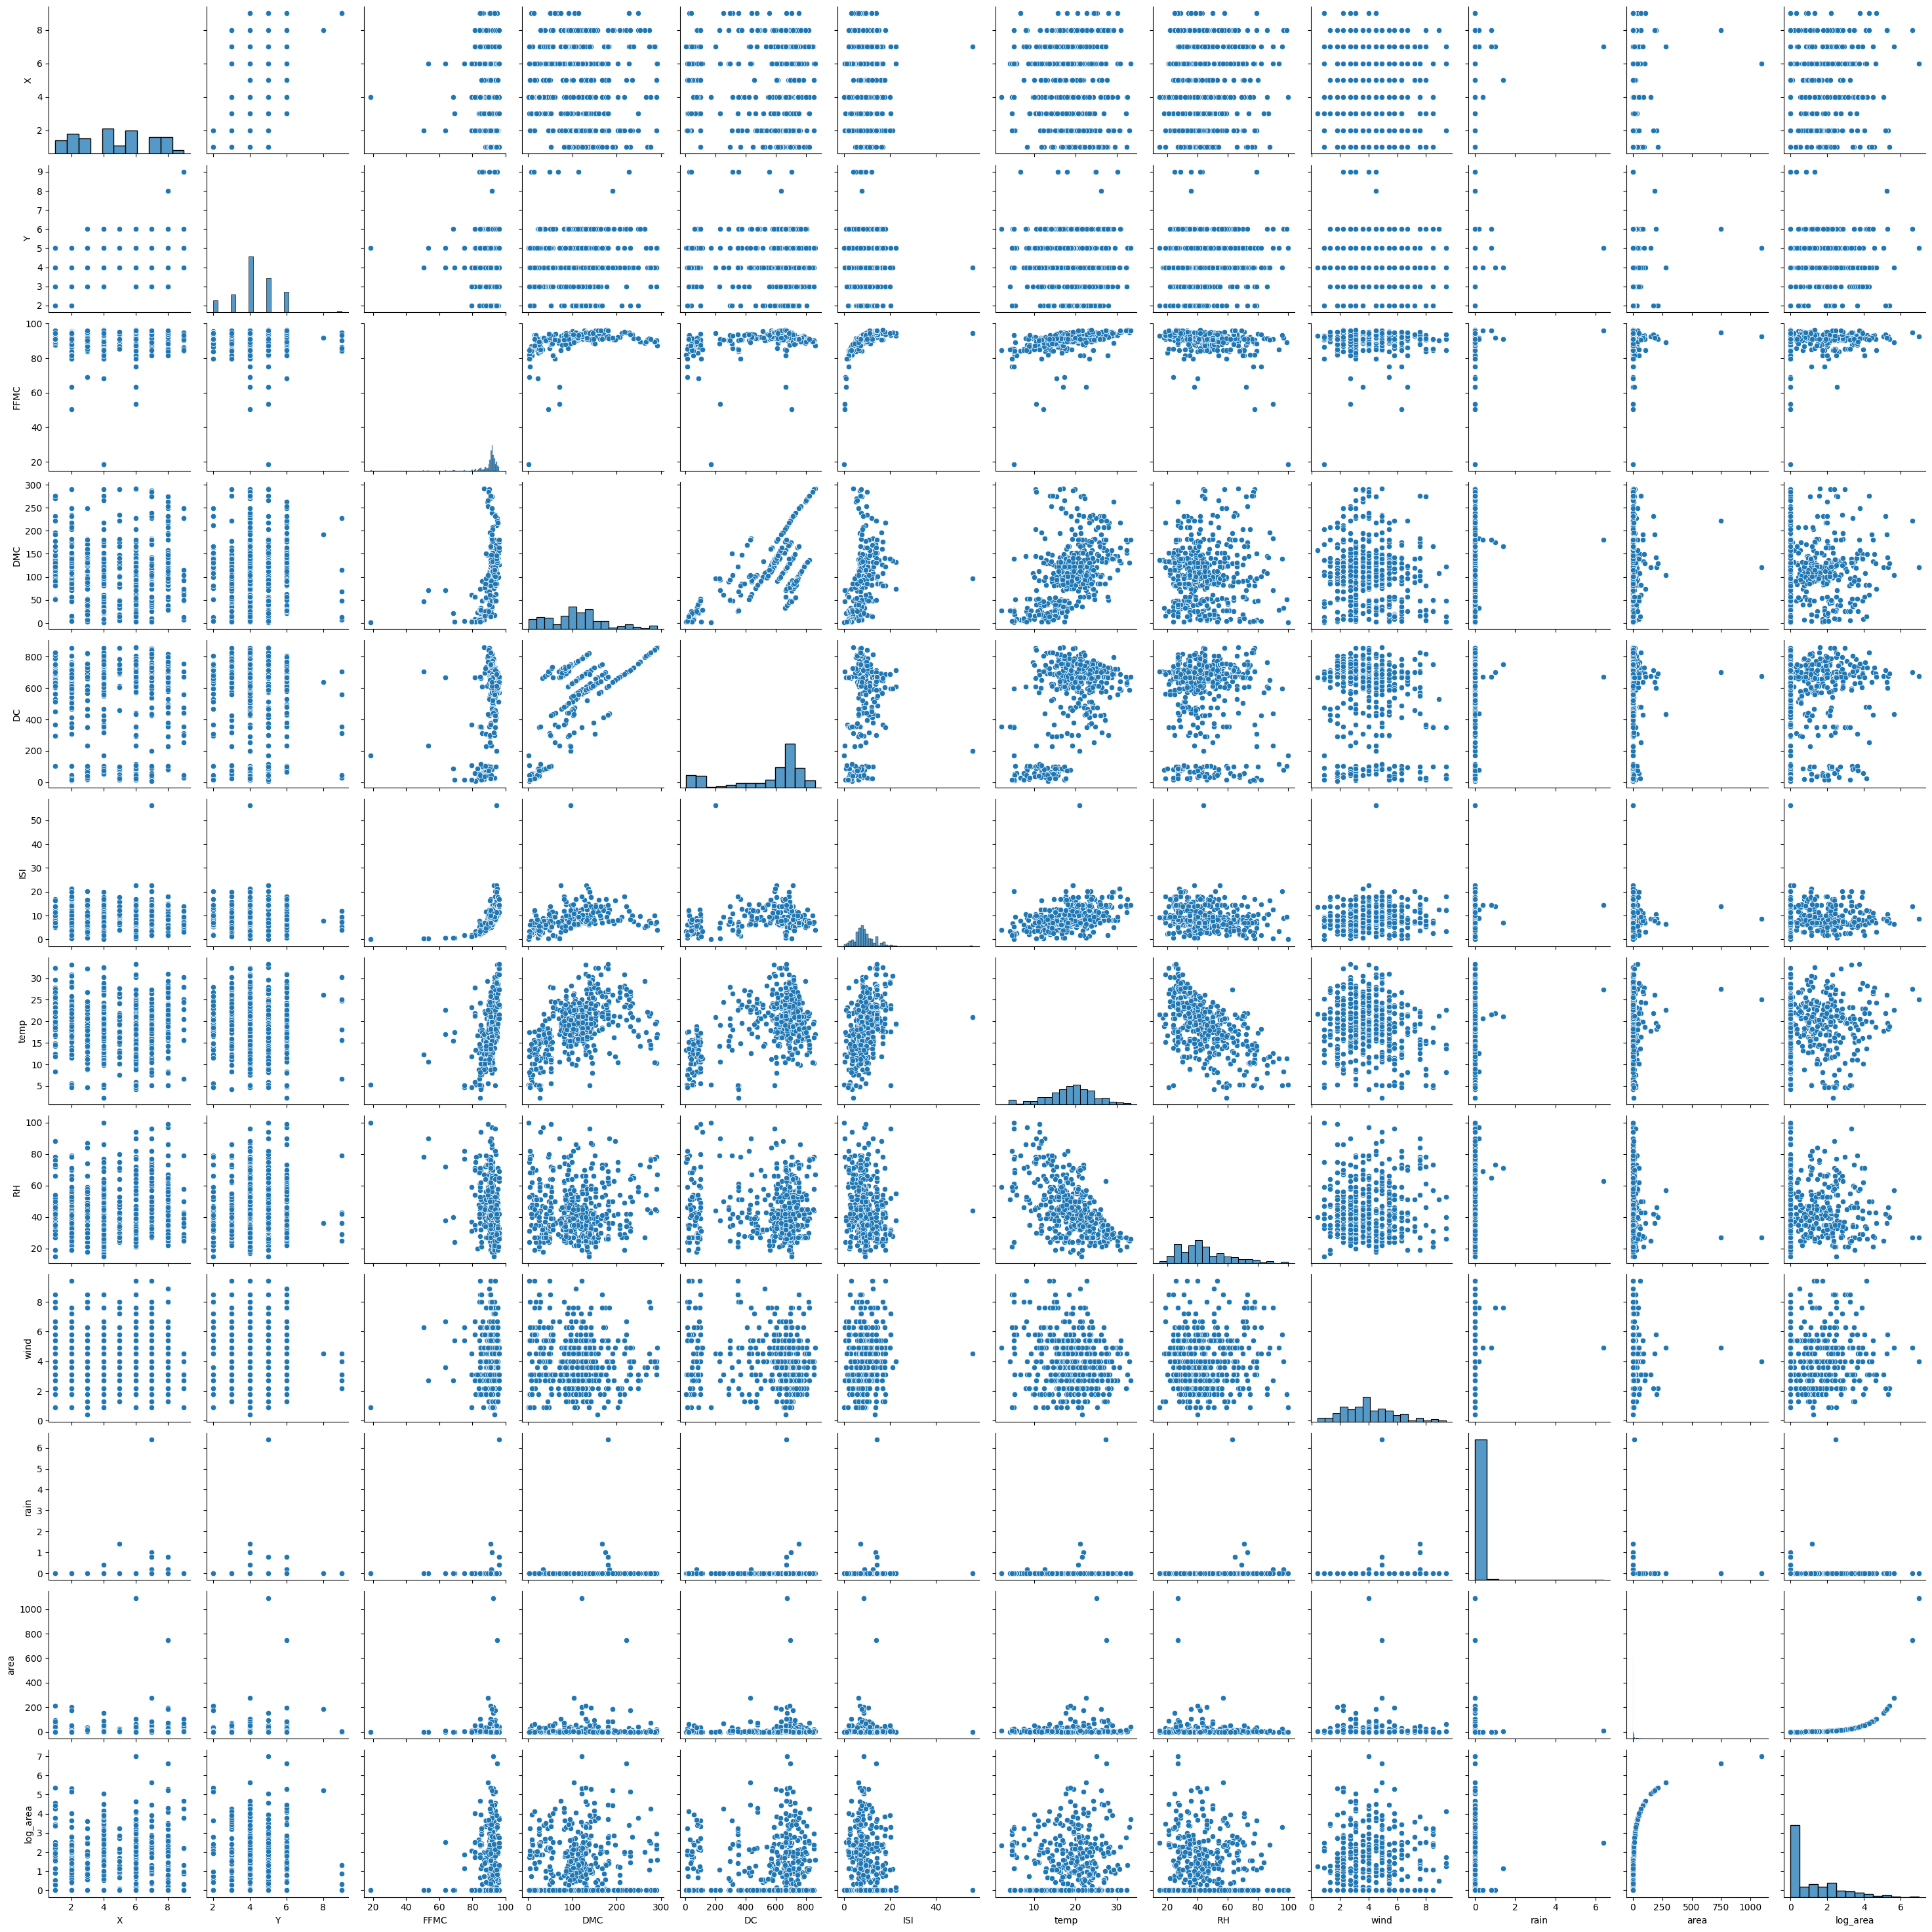

In [8]:
import seaborn as sns

sns.pairplot(forestfires)

Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

<Axes: xlabel='rain', ylabel='log_area'>

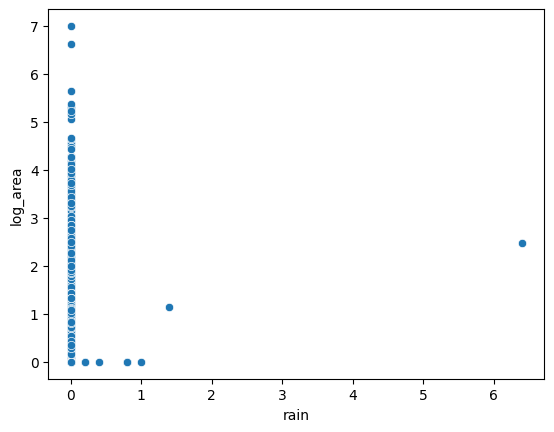

In [14]:
sns.scatterplot(forestfires, x='rain', y='log_area')

## Conclusion

In vast majority of cases the fires occured with no rain (rain == 0). Only in 3 datapoints the rain was at least 1 inch,
so it's not enough to infer the relation between these two variables.

Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

(train, test) = train_test_split(forestfires, test_size=0.3)

train_X = train[['rain', 'wind']]
train_y = train['log_area']

test_X = test[['rain', 'wind']]
test_y = test['log_area']

model = LinearRegression().fit(train_X,train_y)
pred_y = model.predict(test_X)

Question 4.2: Calculate the mean squared error of predict results.

In [50]:
MSE = mean_squared_error(test_y, pred_y)
display(f'Mean square error for rain and wind only: {MSE}')

'Mean square error for rain and wind only: 1.8369739863305294'

Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In [51]:
# NOTE: We're only picking the numerical features.
# X and Y are also categorical features, so they don't really make sense
# Also, we're reusing the same split as for the previous model, for a 
# comparison of MSE that makes more sense.
all_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

train_X = train[all_features]
test_X = test[all_features]

model = LinearRegression().fit(train_X,train_y)
pred_y = model.predict(test_X)

Question 5.2: Calculate the mean squared error of predict results.

In [52]:
MSE = mean_squared_error(test_y, pred_y)
display(f"Mean square error for all the features: {MSE}")


'Mean square error for all the features: 1.841903160452303'